[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - IMDB Dataset

In [1]:
!pip install transformers[sentencepiece] datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

## Datasets library

In [2]:
from datasets import list_datasets
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookco

In [3]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [4]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [5]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

In [6]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [7]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [8]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [9]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [10]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [11]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [12]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [13]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [44]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"Why? Because for one reason, there has never been a more adorable scene in any film than Ann Margret singing ""Bye Bye Birdie"" at the opening. She reprises it again at the ending, too (in a different mood!). Both wonderful. Rent it and see. Even i...",0
1284,"I can say nothing more about this movie than: Man, this SUCKS!!!!! If you really hate yourself and want to do some severe damage to your brain, watch this movie. It's the best cure in the world for taking away happiness. When I started watching t...",0
408,"Chris Rock stars in this remake of Warren Beatty's Heaven Can Wait (itself a remake of the 1941 film Here Comes Mr. Jordan), a comedy about a man who dies before his time, before he can realize his dreams, and his adventures in his new (albeit te...",1
1282,"Jeremy Brett is simply the best Holmes ever, narrowly edging out the great Basil Rathbone of course, and this is probably the best adaptation of a Conon-Doyle short story.<br /><br />A length adaptation includes some new plot strands that fit in ...",1
1447,"If Mulder was looking for his real father here he is Darren McGavin, the first X Files, pity it was only one season long the producers of this show didn't know that they had the makings of a classic on their hands and in 1993 along came Chris Car...",1
1144,I see people writing about how great this movie was. It was horrible! The acting was sub-par at best. It made a lot of money because teenage girls went to see the movie 7 times in the theaters because of Leonardo. Where the hell did they get the ...,0
1381,"In my mind, this remains one of the very best depictions of Superman on TV, as well as one of the most faithful to a particular comics period.<br /><br />This series paid homage to both the Superman films of the '70s/'80s and the Superman comics ...",1
181,"This film, for an after school special, isn't that bad, and that's the problem. Nothing happens. You feel as if you're still in class. A guy teaches a bunch of young underdogs how to be good paint ball players. We never get to see these underdogs...",0
1183,"This is one of those films that explore the culture clash of Eastern born people in Westernized cultures. <br /><br />Loving on Tokyo Time is a sad film about the inability of opposites to attract due to major cultural differences. Ken, rock n'ro...",1
1103,"It's a shame this movie is so hard to get your hands on in the US. I found it through a rare video dealer, and it was certainly worth it. This is, without a doubt, the best film made during the pre-code era, and the finest film of the 1930s. Mast...",1


In [45]:
df.loc[0, 'text']

"I can't believe that they took this off the air. Especially, when they only had a few more episodes left. My daughter, sister and a few of my friends loved watching this show. We were so upset when they stopped showing this because of so called ratings. It is not fair to the people who were watching this show since the beginning. We had a right to see the end. I wish they would take an overall vote from all people with a 3 times a year voting system. They could send out papers in the mail and we as viewers could give an overall vote on all programs that we watch or have heard about. This could also help promote a new show. People would see it and wonder what it is. Not only could you see what the viewers are watching, you could also use this as a tool for free advertisement for TV and cable channels. We want to see the other episodes. Bring it back!!"

In [46]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

"I can't believe that they took this off the air. Especially, when they only had a few more episodes left. My daughter, sister and a few of my friends loved watching this show. We were so upset when they stopped showing this because of so called ratings. It is not fair to the people who were watching this show since the beginning. We had a right to see the end. I wish they would take an overall vote from all people with a 3 times a year voting system. They could send out papers in the mail and we as viewers could give an overall vote on all programs that we watch or have heard about. This could also help promote a new show. People would see it and wonder what it is. Not only could you see what the viewers are watching, you could also use this as a tool for free advertisement for TV and cable channels. We want to see the other episodes. Bring it back!!"

In [47]:
df.label.value_counts()

1    816
0    784
Name: label, dtype: int64

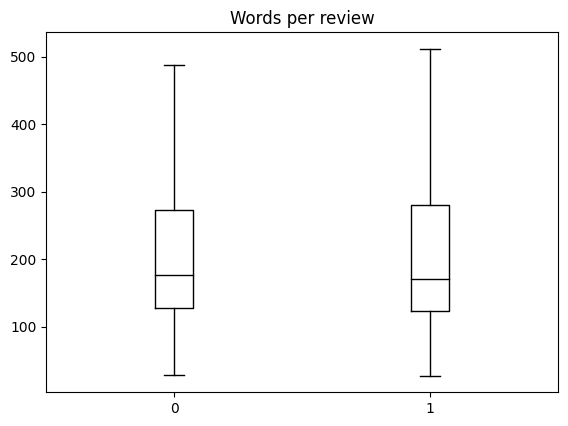

In [48]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [49]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
548,"Before Dogma 95: when Lars used movies as art, not just a story. A beautiful painting about love and death. This is one of my favorite movies of all time. The color... The music... Just perfect.",1,36
859,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27
940,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
1217,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38
1419,A movie best summed up by the scene where a victim simulates disembowelment by pulling some poor animal's intestines out from under her T-shirt. Too terrible for words.,0,28
1465,One of my favorite scenes is at the beginning when guests on a private yacht decide to take an impromptu swim - in their underwear! Rather risqué for 1931!,1,29


In [52]:
imdb.reset_format()

## Tokenizer

In [53]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [54]:
print(imdb_encoded['train'][0])

{'text': "I can't believe that they took this off the air. Especially, when they only had a few more episodes left. My daughter, sister and a few of my friends loved watching this show. We were so upset when they stopped showing this because of so called ratings. It is not fair to the people who were watching this show since the beginning. We had a right to see the end. I wish they would take an overall vote from all people with a 3 times a year voting system. They could send out papers in the mail and we as viewers could give an overall vote on all programs that we watch or have heard about. This could also help promote a new show. People would see it and wonder what it is. Not only could you see what the viewers are watching, you could also use this as a tool for free advertisement for TV and cable channels. We want to see the other episodes. Bring it back!!", 'label': 1, 'input_ids': [101, 146, 1169, 112, 189, 2059, 1115, 1152, 1261, 1142, 1228, 1103, 1586, 119, 11008, 117, 1165, 11

## Tiny IMDB

In [24]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTokenClassification',
 'AutoModelForUniversalSegmentation',
 'AutoModelForVideoClassification',
 'AutoModelForVision2Seq',
 'AutoModelForVisualQuestionAnswering',
 'AutoModelForZeroShotImageClassification',
 'AutoModelForZeroShotObjectDetection

In [25]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifi

In [26]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [27]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
ign

In [28]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.698000,0.874746
2,0.712000,0.855850


In [29]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-0.2793716 ,  0.09940561],
       [-0.25782096,  0.09991689],
       [-0.28406656,  0.07517058],
       [-0.2648234 ,  0.09792308],
       [-0.27655873,  0.06721886],
       [-0.3073737 ,  0.08113923],
       [-0.28802586,  0.10018816],
       [-0.29612657,  0.10158177],
       [-0.25882122,  0.10577062],
       [-0.2730046 ,  0.09064029]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.78682941198349, 'test_runtime': 0.1887, 'test_samples_per_second': 52.986, 'test_steps_per_second': 10.597})

In [30]:
preds.predictions.shape

(10, 2)

In [31]:
preds.predictions.argmax(axis=-1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.3

In [34]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [35]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.649100,0.959619,0.100000
2,0.705400,0.899310,0.100000


## Training run

In [55]:
batch_size = 16
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.232400,0.442561,0.872500


In [38]:


trainer.evaluate()

{'eval_loss': 0.3019380569458008,
 'eval_accuracy': 0.8825,
 'eval_runtime': 6.7877,
 'eval_samples_per_second': 58.93,
 'eval_steps_per_second': 3.683,
 'epoch': 2.0}

In [39]:
trainer.save_model()

In [40]:
model_name

'distilbert-base-cased-finetuned-imdb'

In [41]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.5839211940765381}]

In [42]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.5780147314071655}]